In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [3]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,05/07/2020,5,7,2020,348,7,Afghanistan,AF,AFG,38041757.0,Asia
1,04/07/2020,4,7,2020,302,12,Afghanistan,AF,AFG,38041757.0,Asia
2,03/07/2020,3,7,2020,186,33,Afghanistan,AF,AFG,38041757.0,Asia
3,02/07/2020,2,7,2020,319,28,Afghanistan,AF,AFG,38041757.0,Asia
4,01/07/2020,1,7,2020,279,13,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
27826,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27827,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
27828,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27829,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


In [4]:
covid.to_csv('covid_data.csv')

In [5]:
covid.drop("countryterritoryCode",axis=1,inplace=True)
covid.drop("day",axis=1,inplace=True)
covid.drop("month",axis=1,inplace=True)
covid.drop("year",axis=1,inplace=True)
covid.drop("popData2019",axis=1,inplace=True)

In [6]:
covid.drop("geoId",axis=1,inplace=True)
covid

,dateRep,cases,deaths,countriesAndTerritories,continentExp
0,05/07/2020,348,7,Afghanistan,Asia
1,04/07/2020,302,12,Afghanistan,Asia
2,03/07/2020,186,33,Afghanistan,Asia
3,02/07/2020,319,28,Afghanistan,Asia
4,01/07/2020,279,13,Afghanistan,Asia
...,...,...,...,...,...
27826,25/03/2020,0,0,Zimbabwe,Africa
27827,24/03/2020,0,1,Zimbabwe,Africa
27828,23/03/2020,0,0,Zimbabwe,Africa
27829,22/03/2020,1,0,Zimbabwe,Africa


In [7]:
covid.rename(columns={'dateRep':'date','countriesAndTerritories':'country', 'continentExp':'continent'}, inplace=True)

In [8]:
covid

,date,cases,deaths,country,continent
0,05/07/2020,348,7,Afghanistan,Asia
1,04/07/2020,302,12,Afghanistan,Asia
2,03/07/2020,186,33,Afghanistan,Asia
3,02/07/2020,319,28,Afghanistan,Asia
4,01/07/2020,279,13,Afghanistan,Asia
...,...,...,...,...,...
27826,25/03/2020,0,0,Zimbabwe,Africa
27827,24/03/2020,0,1,Zimbabwe,Africa
27828,23/03/2020,0,0,Zimbabwe,Africa
27829,22/03/2020,1,0,Zimbabwe,Africa


In [9]:
covid1 = covid.iloc[::-1]
covid1

,date,cases,deaths,country,continent
27830,21/03/2020,1,0,Zimbabwe,Africa
27829,22/03/2020,1,0,Zimbabwe,Africa
27828,23/03/2020,0,0,Zimbabwe,Africa
27827,24/03/2020,0,1,Zimbabwe,Africa
27826,25/03/2020,0,0,Zimbabwe,Africa
...,...,...,...,...,...
4,01/07/2020,279,13,Afghanistan,Asia
3,02/07/2020,319,28,Afghanistan,Asia
2,03/07/2020,186,33,Afghanistan,Asia
1,04/07/2020,302,12,Afghanistan,Asia


In [10]:
covid1.head()

,date,cases,deaths,country,continent
27830,21/03/2020,1,0,Zimbabwe,Africa
27829,22/03/2020,1,0,Zimbabwe,Africa
27828,23/03/2020,0,0,Zimbabwe,Africa
27827,24/03/2020,0,1,Zimbabwe,Africa
27826,25/03/2020,0,0,Zimbabwe,Africa


In [11]:
country_wise = covid1.groupby(["country"]).sum()
country_wise

,cases,deaths
country,,
Afghanistan,32672,826
Albania,2819,74
Algeria,15500,946
Andorra,855,52
Angola,346,19
...,...,...
Vietnam,355,0
Western_Sahara,519,1
Yemen,1248,337


In [12]:
k=country_wise.nlargest(10, ['cases']) 
k

,cases,deaths
country,,
United_States_of_America,2839542,129676
Brazil,1577004,64265
Russia,674515,10027
India,673165,19268
Peru,299080,10412
Chile,291847,6192
United_Kingdom,284900,44198
Mexico,252165,30366
Spain,250545,28385


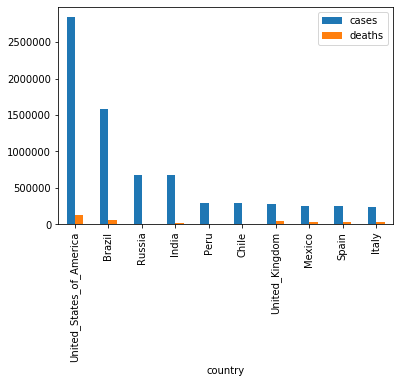

In [13]:
k.plot.bar()
plt.savefig("Top 10 countries in COVID-19 cases.png")

In [14]:
k.iloc[2]

cases     674515
deaths     10027
Name: Russia, dtype: int64

In [15]:
l=country_wise.nlargest(10, ['deaths'])
l

,cases,deaths
country,,
United_States_of_America,2839542,129676
Brazil,1577004,64265
United_Kingdom,284900,44198
Italy,241419,34854
Mexico,252165,30366
France,166960,29893
Spain,250545,28385
India,673165,19268
Iran,237878,11408


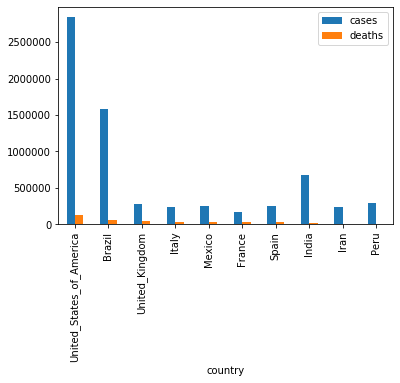

In [16]:
l.plot.bar()
plt.savefig("Top 10 countries in COVID-19 deaths.png")